In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_probability as tfp

D:\Software\anaconda3\lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.12.2 when it was built against 1.12.1, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [3]:
tf.function(input_signature=(tf.TensorSpec(shape=[None, None], dtype = tf.float32), 
                                 tf.TensorSpec(shape=[None, None], dtype = tf.float32),))
def BSpline0(T, Ti, Gdelta):
    temp1 = tf.cast(tf.where(((Ti <= T) & (T < (Ti + Gdelta))), 1.0, 0.0), tf.float32)
    return temp1
    
tf.function(input_signature=(tf.TensorSpec(shape=[None, None], dtype = tf.float32), 
                             tf.TensorSpec(shape=[None, None], dtype = tf.float32),))
def BSpline1(T, Ti, Gdelta):
    temp0 = 1 * Gdelta
    diff0 = (T - Ti) / temp0
    diff1 = (Ti + temp0 + Gdelta - T)/temp0
    temp2 = ( diff0 * BSpline0(T, Ti, Gdelta) ) + ( diff1 * BSpline0(T, Ti+Gdelta, Gdelta) )
    return temp2

tf.function(input_signature=(tf.TensorSpec(shape=[None, None], dtype = tf.float32), 
                             tf.TensorSpec(shape=[None, None], dtype = tf.float32),))
def BSpline2(T, Ti, Gdelta):
    temp0 = 2 * Gdelta
    diff0 = (T - Ti) / temp0
    diff1 = (Ti + temp0 + Gdelta - T)/temp0
    temp2 = ( diff0 * BSpline1(T, Ti, Gdelta) ) + ( diff1 * BSpline1(T, Ti+Gdelta, Gdelta) )
    return temp2
    
tf.function(input_signature=(tf.TensorSpec(shape=[None, None], dtype = tf.float32), 
                             tf.TensorSpec(shape=[None, None], dtype = tf.float32),))
def BSpline3(T, Ti, Gdelta):
    temp0 = 3 * Gdelta
    diff0 = (T - Ti) / temp0
    diff1 = (Ti + temp0 + Gdelta - T)/temp0
    temp2 = ( diff0 * BSpline2(T, Ti, Gdelta) ) + ( diff1 * BSpline2(T, Ti+Gdelta, Gdelta) )
    return temp2

In [4]:

@tf.function
def SplineFunc(X, AVals, gridRange, p, G):
    dist = (gridRange[1] - gridRange[0]) / tf.cast(p + G, tf.float32)
    func = [BSpline0, BSpline1, BSpline2, BSpline3][p]
    tempX = tf.repeat(tf.expand_dims(X, axis = 1), G, axis = 1)
    siz = tf.gather(tf.shape(X), 0)
    tempXi = tf.transpose(tf.repeat(tf.expand_dims(tf.range(0, G, 1.0)*dist + gridRange[0], axis = 1), siz, axis = 1))
    return tf.matmul(tf.cast(AVals, tf.float32), tf.transpose(func(tempX, tempXi, dist)))
    
    

In [5]:
X = tf.linspace(-0.25, 1.25, 100000, axis = 0)
Arr = np.zeros([4, 5])
func = [BSpline0, BSpline1, BSpline2, BSpline3]
for p in range(4):
    for a in range(5):
        Y = func[p](X, 0, 1/(p+1)) * func[p](X, a/(p+1), 1/(p+1))
        Arr[p][a] = tfp.math.trapz(Y, X).numpy()

In [6]:
Arr

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [3.33333343e-01, 8.33333358e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.83333337e-01, 7.22222105e-02, 2.77777691e-03, 0.00000000e+00,
        0.00000000e+00],
       [1.19841263e-01, 5.90773784e-02, 5.95238060e-03, 4.96031753e-05,
        0.00000000e+00]])

In [7]:
N = 2000
X = tf.linspace(-2.0, 2.0, N, axis = 0)
Y = SplineFunc(X, [[1.0, -1.0, 1.2, 0.6, -1.5]], [-1.0, 1.0], 2, 5)

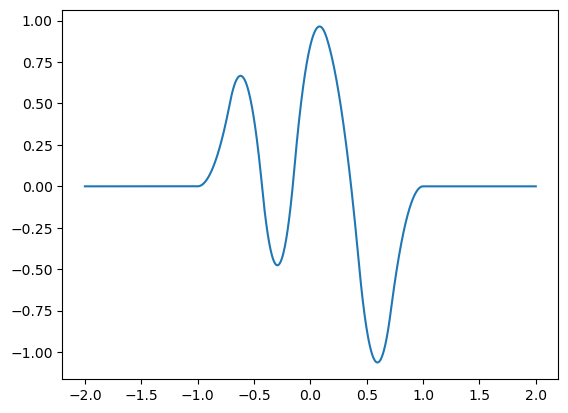

In [8]:
plt.plot(X, Y[0])

In [35]:
G = 5
p = 2
gridRange = [-1.0, 1.0]
func = [BSpline0, BSpline1, BSpline2, BSpline3][p]

In [36]:
MulArr = np.zeros([G, G])
temp = (G+p)/((p+1) * (gridRange[1] - gridRange[0]))
for i in range(G):
    for j in range(G):
        MulArr[i][j] = Arr[p][np.minimum((p+1), np.abs(i-j))] / temp
invMulArr = tf.cast(tf.linalg.inv(MulArr), tf.float32)

In [37]:
Gdelta = (gridRange[1] - gridRange[0]) / (G + p)
B = []
for i in range(G):
    B.append(func(X, gridRange[0] + i*(Gdelta), Gdelta))
B = tf.constant(np.array(B), tf.float32)

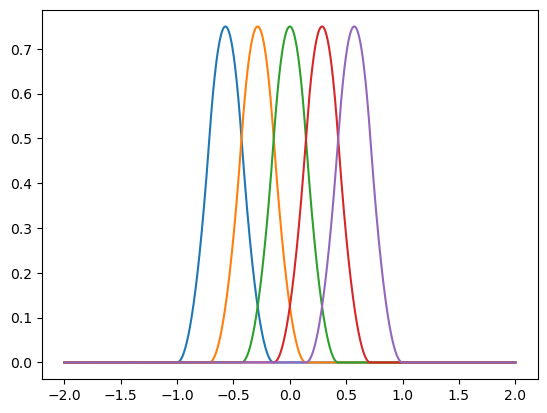

In [38]:
for i in range(G):
    plt.plot(X, B[i])

In [39]:
Iftaara = tfp.math.trapz(np.repeat(Y, G, axis = 0) * B, np.repeat(np.reshape(X, (1, N)), G, axis = 0), axis = 1)

In [40]:
newGs = np.matmul(Iftaara, np.transpose(invMulArr))

In [41]:
YN = SplineFunc(X, [newGs], gridRange, p, G)

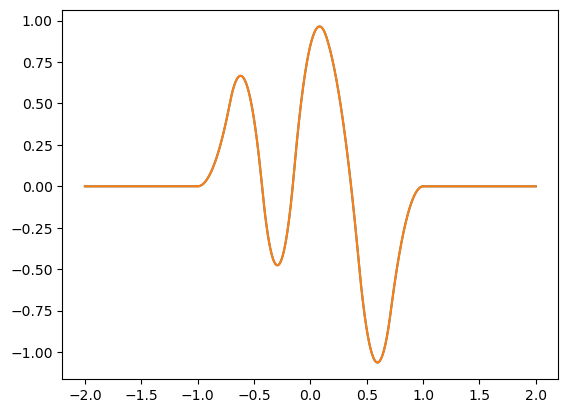

In [42]:
plt.plot(X, Y[0])
plt.plot(X, YN[0])

In [512]:
(tf.ones([4, 3, 2, 3], tf.float32) * tf.constant([[1, 2, 1], [2, 1, 2]], tf.float32))[3, 2]

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 1.],
       [2., 1., 2.]], dtype=float32)>

In [545]:
@tf.function(input_signature=(tf.TensorSpec(shape = [], dtype = tf.float32),))
def King(x):
    return x+1

In [546]:
King(tf.constant(1.0))

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [542]:
tf.shape(tf.constant(1.0))

<tf.Tensor: shape=(0,), dtype=int32, numpy=array([], dtype=int32)>